# Digit Recognizer

## Machine Learning

In this notebook, I will try to use sklearn to implement machine learning in digit recognizer via two methods: SVM and K-nearest neighbors. 

---
## 1. Load The Data

In [1]:
## Load data
import csv
import numpy as np
from sklearn.model_selection import train_test_split

## define a function that translat the string into float in the array
def trans_str2int(strlist):
    intlist = []
    for i in range(len(strlist)):
        intlist.append([])
        for j in range(len(strlist[i])):
            intlist[i].append(int(strlist[i][j]))
    return list(intlist)

X_str = []
Y = []
with open('./data/train.csv') as csvfile:
    lines = csv.reader(csvfile)
    for line in lines:
        Y.append(line[0])
        image = np.array(line[1:])
        X_str.append(image)
    del X_str[0]
    del Y[0]

x_test_str = []
with open('./data/test.csv') as csvfile:
    lines = csv.reader(csvfile)
    for line in lines:
        image = np.array(line)
        x_test_str.append(image)
    del x_test_str[0]

X = trans_str2int(X_str)
x_test = trans_str2int(x_test_str)
y_test = np.zeros(len(x_test))

## split the train data into training and validation part to check the model
## validation set takes 3% data from the whole training data 
x_train, x_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.03, random_state=1)

---

## 2. Dataset Summary & Exploration

### Provide a Basic Summary of the Data Set

In [2]:
## print the size of each set
n_train = len(x_train)

## Number of validation examples
n_validation = len(x_valid)

## Number of testing examples.
n_test = len(x_test)

## The shape of the data
image_shape = str(1) + '*' + str(len(x_train[0]))

## Numbers of unique classes/labels in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 40740
Number of validation examples = 1260
Number of testing examples = 28000
Image data shape = 784*1
Number of classes = 10


### Include an exploratory visualization of the dataset

8


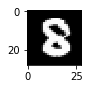

In [3]:
## Data exploration visualization code goes here.
import matplotlib.pyplot as plt
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

index = random.randint(0,len(x_test))
image = np.array(x_train[index])
image = image.reshape((28,28))

plt.figure(figsize=(1,1))
plt.imshow(image, cmap='gray')
print(y_train[index])

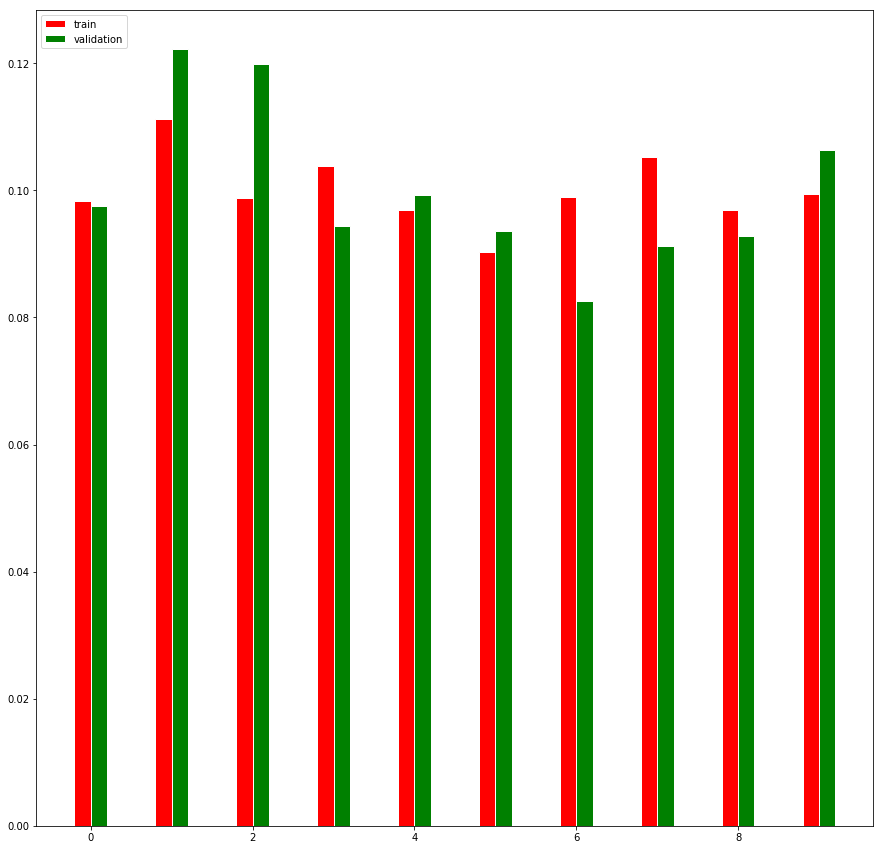

In [4]:
## show the data in picture
import copy

def datacount(data):
    number = []
    count = copy.deepcopy(data)
    count.sort()
    for i in range(9):
        a = count.index(str(i+1))-count.index(str(i))
        number.append(a)
        
    a = len(count)-count.index(str(9))
    number.append(a)
    return number

signs = np.arange(10)
plt.figure(figsize=(15,15))
percent_train = np.divide(datacount(y_train),len(y_train))
percent_valid = np.divide(datacount(y_valid),len(y_valid))
# percent_test = np.divide(datacount(y_test),len(y_test))
plt.bar(signs-0.1, percent_train, width = 0.2, fc = 'r', edgecolor = 'white', label='train', lw=1)
plt.bar(signs+0.1, percent_valid, width = 0.2, fc = 'g', edgecolor = 'white', label='validation', lw=1)
# plt.bar(signs+0.25, percent_test, width = 0.25, fc = 'b', edgecolor = 'white', label='test', lw=1)
plt.legend(loc="upper left")
plt.savefig('./pictures/data_bar.jpg')
plt.show()

In [5]:
## show the data in table

print("{0:<3}".format("DigitName"), "{0:10}".format("  Training "),"{0:10}".format(" Validation"))
for j in range(10):
    print('   {0:<3}'.format(j),
          "{0:10.2f}%".format(percent_train[j]*100 ),"{0:10.2f}%".format(percent_valid[j]*100 ))

DigitName   Training   Validation
   0         9.84%       9.76%
   1        11.12%      12.22%
   2         9.88%      11.98%
   3        10.39%       9.44%
   4         9.69%       9.92%
   5         9.03%       9.37%
   6         9.90%       8.25%
   7        10.52%       9.13%
   8         9.69%       9.29%
   9         9.95%      10.63%


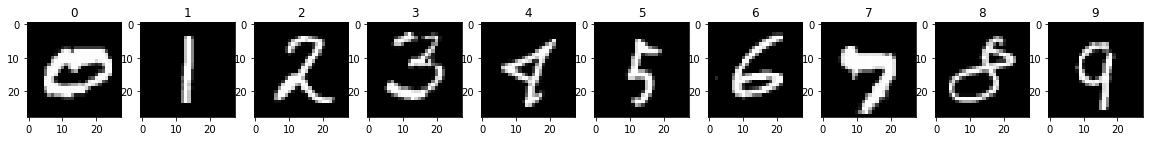

In [6]:
## visualize all the examples

fig = plt.figure(figsize=(20,20))

for i in range(10):
    y = list(y_train)
    index = y.index(str(i))
    fig.add_subplot(5,10,i+1)
    fig.add_subplot(5,10,i+1).set_title(str(i))
    plt.imshow(np.array(x_train[index]).reshape(28,28), cmap='gray')

----

## 3. Data processing

To train the codel more effectively, I will do some pre-processing (normalization).

The image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

In [7]:
## normalized the pixels
x_train = (np.array(x_train)-128.0)/128.0
x_valid = (np.array(x_valid)-128.0)/128.0
x_test = (np.array(x_test)-128.0)/128.0

----

## 4. KNN method

In [14]:
## train the model

from sklearn import neighbors

knn = neighbors.KNeighborsClassifier(20, weights='distance')
knn.fit(x_train, y_train)
score = knn.score(x_valid, y_valid)
valid_predict = knn.predict(x_valid)
print(score)

0.953968253968


In [21]:
## evaluate the model

# define a function to calculate the precision, recall and F value
def precion_and_recall(prediction,proves):
    calcu = [[0,0,0,i] for i in range(10)]
    for i in range(len(prediction)):
        if proves[i] == prediction[i]:
            calcu[proves[i]][1] += 1 
        else:
            calcu[proves[i]][0] += 1
            calcu[prediction[i]][2] += 1
    ret = calcu
    for j in range(len(calcu)):
        ret[j][0] = calcu[j][1]/(calcu[j][1]+calcu[j][0])  ### precision
        ret[j][1] = calcu[j][1]/(calcu[j][1]+calcu[j][2])  ### recall
        ret[j][2] = ret[j][0]*ret[j][1]*2/(ret[j][1]+ret[j][0])  ### F
    return ret

# translate the str into int
number_valid = datacount(y_valid)
prove = [int(i) for i in y_valid]
predict = [int(j) for j in valid_predict]

# calculate the precision, recall and F value and sort it according to F value
pre_and_re = precion_and_recall(predict, prove)
pre_and_re.sort(key=lambda x:x[2])

In [34]:
## list the result in sheet

signames = range(10)

print("{0:<3}".format("DigitName"),  "{0:10}".format(" Precision"),"{0:10}".format("   Recall"), " {0:10}".format("     F"))
for j in range(len(pre_and_re)):
    print('   {0:<3}'.format(signames[pre_and_re[j][3]]),
      "{0:10.2f}%".format(pre_and_re[j][0]*100),"{0:10.2f}%".format(pre_and_re[j][1]*100),
      "{0:10.2f}%".format(pre_and_re[j][2]*100))

DigitName  Precision    Recall        F    
   5        93.22%      94.83%      94.02%
   3        92.44%      95.65%      94.02%
   7        95.65%      94.02%      94.83%
   9        94.78%      96.21%      95.49%
   4        96.00%      96.00%      96.00%
   8        94.87%      97.37%      96.10%
   2        98.01%      96.73%      97.37%
   6        98.08%      97.14%      97.61%
   0        99.19%      96.83%      97.99%
   1       100.00%      98.09%      99.04%


## 5. SVM Method

In [16]:
# train the model

from sklearn import svm

clf = svm.SVC()
clf.fit(x_train, y_train)
score = clf.score(x_train, y_train)
print(score)

0.971060382916


In [32]:
## evaluate the model

valid_predict = clf.predict(x_valid)

# translate the str into int
number_valid = datacount(y_valid)
prove = [int(i) for i in y_valid]
predict = [int(j) for j in valid_predict]

# calculate the precision, recall and F value and sort it according to F value
pre_and_re = precion_and_recall(predict, prove)
pre_and_re.sort(key=lambda x:x[2])

In [35]:
# list the result in sheet

print("{0:<3}".format("DigitName"),  "{0:10}".format(" Precision"),"{0:10}".format("   Recall"), " {0:10}".format("     F"))
for j in range(len(pre_and_re)):
    print('   {0:<3}'.format(signames[pre_and_re[j][3]]),
      "{0:10.2f}%".format(pre_and_re[j][0]*100),"{0:10.2f}%".format(pre_and_re[j][1]*100),
      "{0:10.2f}%".format(pre_and_re[j][2]*100))

DigitName  Precision    Recall        F    
   5        93.22%      94.83%      94.02%
   3        92.44%      95.65%      94.02%
   7        95.65%      94.02%      94.83%
   9        94.78%      96.21%      95.49%
   4        96.00%      96.00%      96.00%
   8        94.87%      97.37%      96.10%
   2        98.01%      96.73%      97.37%
   6        98.08%      97.14%      97.61%
   0        99.19%      96.83%      97.99%
   1       100.00%      98.09%      99.04%
